# Usage Examples

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from post_analysis_clustering.utils import timer

In [70]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['species'] = iris.target
df_iris['species_name'] = df_iris['species'].map(dict(zip(range(3), iris.target_names)))
df_iris = df_iris.reset_index(names='id')

df_iris.head()

,id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,0,5.1,3.5,1.4,0.2,0,setosa
1,1,4.9,3.0,1.4,0.2,0,setosa
2,2,4.7,3.2,1.3,0.2,0,setosa
3,3,4.6,3.1,1.5,0.2,0,setosa
4,4,5.0,3.6,1.4,0.2,0,setosa


In [71]:
iris_feature_list = df_iris.drop(columns=['id','species','species_name'],axis=1).columns.to_list()
iris_feature_list

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## plot_profile

In [72]:
from post_analysis_clustering.plot_profile import prep_dist, prep_frequency_feature, plot_feature_distributions

In [73]:
all_df, segment_dfs = prep_dist(raw_df=df_iris, 
                features = iris_feature_list , 
                primary_key= 'id', 
                target_cluster = 'species')
df_dict_all = {'all segment': all_df}
df_dict_0 = {'segment 0' : segment_dfs[0]}
df_dict_1 =  {'segment 1' : segment_dfs[1]}
df_dict_2 =  {'segment 2' : segment_dfs[2]}

Processing segment 0
Processing segment 1
Processing segment 2
Execution time for prep_dist: 0.0048 seconds


In [74]:
all_df

,id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,5.1,3.5,1.4,0.2
1,1,4.9,3.0,1.4,0.2
2,2,4.7,3.2,1.3,0.2
3,3,4.6,3.1,1.5,0.2
4,4,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3
146,146,6.3,2.5,5.0,1.9
147,147,6.5,3.0,5.2,2.0
148,148,6.2,3.4,5.4,2.3


Execution time for prep_frequency_feature: 0.0027 seconds
Execution time for prep_frequency_feature: 0.0024 seconds
Execution time for prep_frequency_feature: 0.0024 seconds
Execution time for prep_frequency_feature: 0.0024 seconds


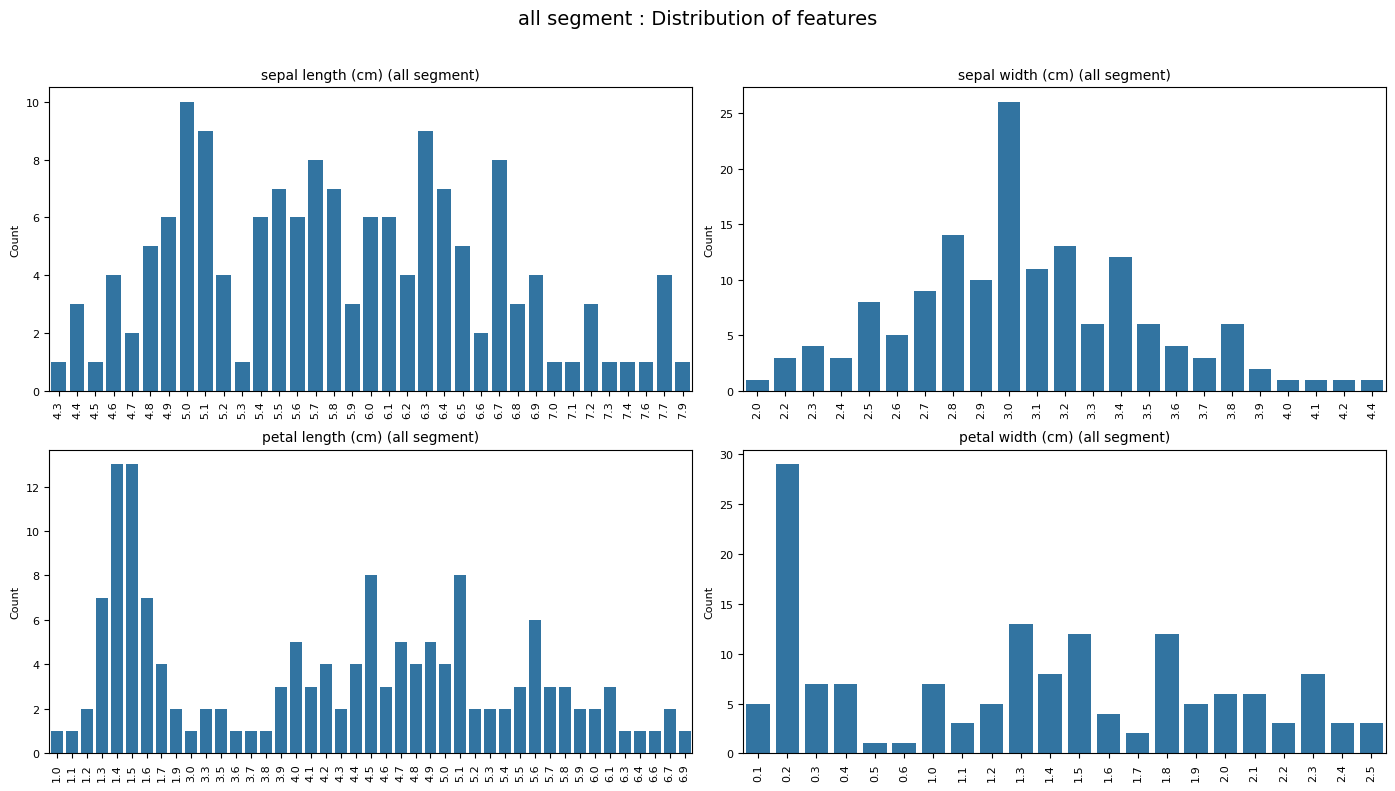

Execution time for plot_feature_distributions: 1.4783 seconds


In [75]:
plot_feature_distributions(
    df_dict=df_dict_all,
    features=iris_feature_list,
    primary_key='id',
    # binning_keywords=['BENE','PREMIUM'],  # or None
    n_bins=10
)

## lean_cluster

In [76]:
from post_analysis_clustering.lean_feature import *

In [77]:
binary_df = prep_binary_class(df=df_iris, features=iris_feature_list, target_cluster='species_name')
binary_df

Execution time for prep_binary_class: 0.0021 seconds


,id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name,is_cluster_setosa,is_cluster_versicolor,is_cluster_virginica
0,0,5.1,3.5,1.4,0.2,0,setosa,1,0,0
1,1,4.9,3.0,1.4,0.2,0,setosa,1,0,0
2,2,4.7,3.2,1.3,0.2,0,setosa,1,0,0
3,3,4.6,3.1,1.5,0.2,0,setosa,1,0,0
4,4,5.0,3.6,1.4,0.2,0,setosa,1,0,0
...,...,...,...,...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,2,virginica,0,0,1
146,146,6.3,2.5,5.0,1.9,2,virginica,0,0,1
147,147,6.5,3.0,5.2,2.0,2,virginica,0,0,1
148,148,6.2,3.4,5.4,2.3,2,virginica,0,0,1


### debug one cluster

In [78]:
importance_cluster0_df = cal_imp_one_binary_class(df=df_iris, 
                         features=iris_feature_list, 
                         target_cluster='species_name', 
                         focus_segment='setosa')
importance_cluster0_df

Execution time for prep_binary_class: 0.0019 seconds

Training Decision Tree...
Execution time for calculate_permutation_importance: 0.0797 seconds
Execution time for train_and_evaluate_model: 0.0936 seconds

Training Random Forest...
Execution time for calculate_permutation_importance: 0.3374 seconds
Execution time for train_and_evaluate_model: 0.4983 seconds

Training HistGradientBoosting...
Execution time for calculate_permutation_importance: 0.1399 seconds
Execution time for train_and_evaluate_model: 0.2086 seconds

Training Logistic Regression...
Execution time for calculate_permutation_importance: 0.0739 seconds
Execution time for train_and_evaluate_model: 0.0906 seconds

Training Logistic Regression (L1)...
Execution time for calculate_permutation_importance: 0.0753 seconds
Execution time for train_and_evaluate_model: 0.0879 seconds

Training Naive Bayes...
Execution time for calculate_permutation_importance: 0.0854 seconds
Execution time for train_and_evaluate_model: 0.0989 sec

,Feature,Decision Tree,Random Forest,HistGradientBoosting,Logistic Regression,Logistic Regression (L1),Naive Bayes
0,petal length (cm),0.446667,0.066667,0.446667,0.44,0.446667,0.223333
1,petal width (cm),0.000000,0.040000,0.000000,0.00,0.000000,0.223333
2,sepal length (cm),0.000000,0.000000,0.000000,0.00,0.000000,0.030000
3,sepal width (cm),0.000000,0.000000,0.000000,0.00,0.000000,0.000000


In [79]:
prep_rank_importance(importance_cluster0_df)

Execution time for prep_rank_importance: 0.0052 seconds


,Feature,variable,value,rank
0,petal length (cm),Decision Tree,0.446667,1
1,petal width (cm),Decision Tree,0.000000,2
2,sepal length (cm),Decision Tree,0.000000,2
3,sepal width (cm),Decision Tree,0.000000,2
4,petal length (cm),Random Forest,0.066667,1
5,petal width (cm),Random Forest,0.040000,2
6,sepal length (cm),Random Forest,0.000000,3
7,sepal width (cm),Random Forest,0.000000,3
8,petal length (cm),HistGradientBoosting,0.446667,1
9,petal width (cm),HistGradientBoosting,0.000000,2


In [80]:
pivot_rank_importance(importance_cluster0_df, n_rank=5)

Execution time for prep_rank_importance: 0.0053 seconds
Execution time for pivot_rank_importance: 0.0105 seconds


rank,1,2,3
Feature,,,
petal length (cm),6,0,0
petal width (cm),1,5,0
sepal length (cm),0,5,1
sepal width (cm),0,4,2


### process all cluster

In [81]:
final_imp,final_pvt_imp_score = cal_imp_all_binary_class(df=df_iris, 
                                                        features=iris_feature_list, 
                                                        target_cluster='species_name',
                                                        n_rank=5)

Processing segment setosa
Execution time for prep_binary_class: 0.0022 seconds

Training Decision Tree...
Execution time for calculate_permutation_importance: 0.0818 seconds
Execution time for train_and_evaluate_model: 0.0968 seconds

Training Random Forest...
Execution time for calculate_permutation_importance: 0.3438 seconds
Execution time for train_and_evaluate_model: 0.5058 seconds

Training HistGradientBoosting...
Execution time for calculate_permutation_importance: 0.1425 seconds
Execution time for train_and_evaluate_model: 0.2072 seconds

Training Logistic Regression...
Execution time for calculate_permutation_importance: 0.0985 seconds
Execution time for train_and_evaluate_model: 0.1204 seconds

Training Logistic Regression (L1)...
Execution time for calculate_permutation_importance: 0.0774 seconds
Execution time for train_and_evaluate_model: 0.0904 seconds

Training Naive Bayes...
Execution time for calculate_permutation_importance: 0.0784 seconds
Execution time for train_and_

In [82]:
final_imp

,Feature,Decision Tree,Random Forest,HistGradientBoosting,Logistic Regression,Logistic Regression (L1),Naive Bayes,Segment
0,petal length (cm),0.446667,0.066667,0.446667,0.440000,0.446667,0.223333,setosa
1,petal width (cm),0.000000,0.040000,0.000000,0.000000,0.000000,0.223333,setosa
2,sepal length (cm),0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,setosa
3,sepal width (cm),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,setosa
4,petal length (cm),0.306667,0.126667,0.350000,0.163333,0.010000,0.180000,versicolor
5,petal width (cm),0.156667,0.146667,0.123333,0.183333,0.156667,0.236667,versicolor
6,sepal length (cm),0.000000,0.000000,0.000000,0.010000,0.036667,0.023333,versicolor
7,sepal width (cm),0.000000,0.000000,0.000000,0.120000,0.123333,0.033333,versicolor
8,petal length (cm),0.220000,0.220000,0.406667,0.353333,0.310000,0.176667,virginica
9,petal width (cm),0.283333,0.186667,0.140000,0.233333,0.226667,0.190000,virginica


In [83]:
final_pvt_imp_score

,Feature,1,2,3,4,Segment
0,petal length (cm),6,0,0,0,setosa
1,petal width (cm),1,5,0,0,setosa
2,sepal length (cm),0,5,1,0,setosa
3,sepal width (cm),0,4,2,0,setosa
4,petal length (cm),2,3,0,1,versicolor
5,petal width (cm),4,2,0,0,versicolor
6,sepal length (cm),0,0,4,2,versicolor
7,sepal width (cm),0,1,5,0,versicolor
8,petal length (cm),4,2,0,0,virginica
9,petal width (cm),2,4,0,0,virginica


Plotting heatmap for segment setosa


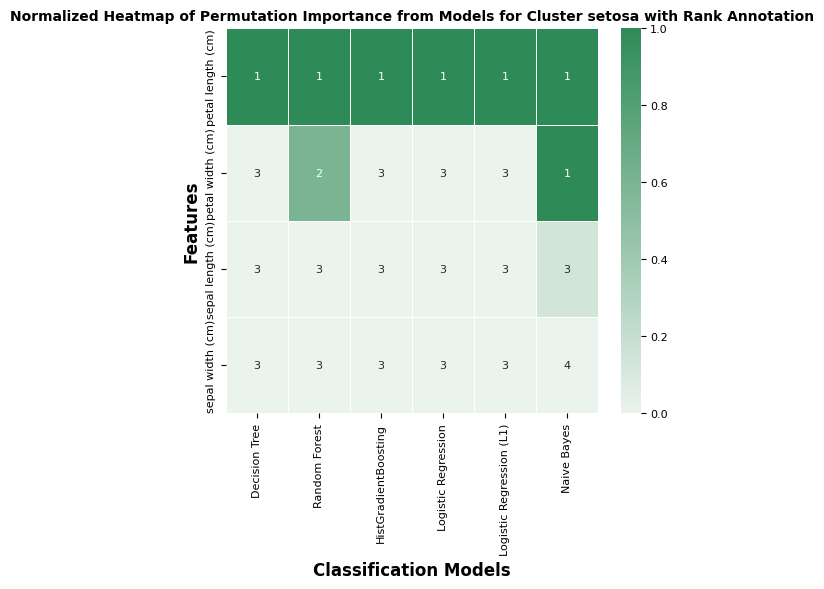

Plotting heatmap for segment versicolor


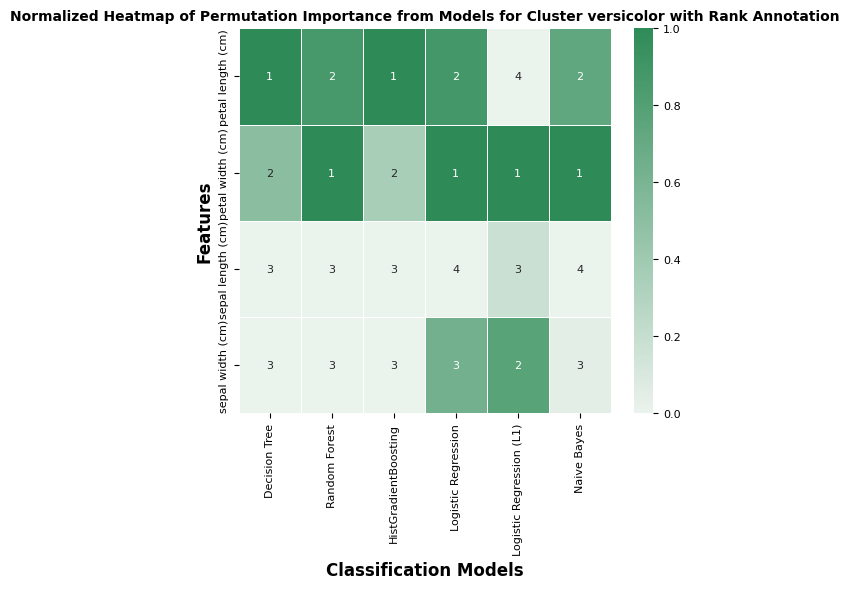

Plotting heatmap for segment virginica


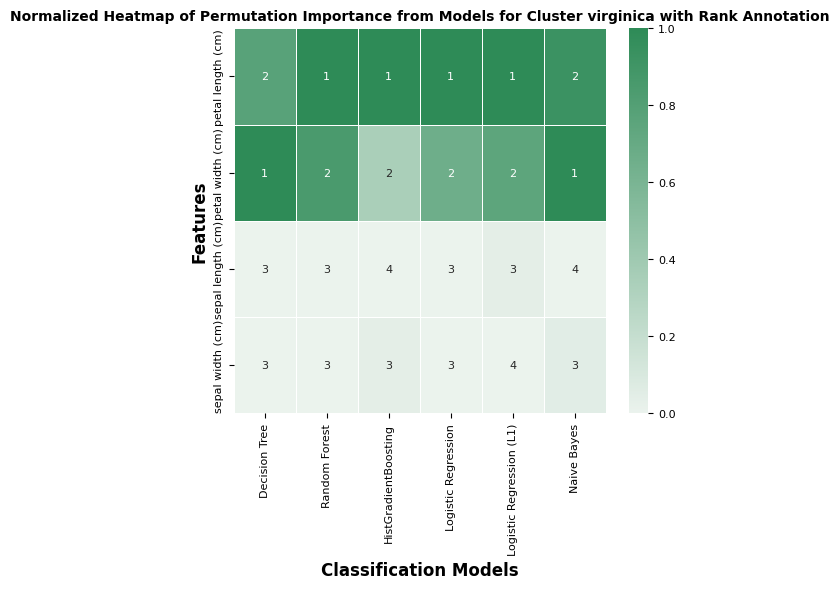

Execution time for plot_heatmap_imp_all_binary_class: 0.6974 seconds


In [84]:
plot_heatmap_imp_all_binary_class(final_imp,
                                  compare_type='Normalized')

In [85]:
final_pvt_imp_score

,Feature,1,2,3,4,Segment
0,petal length (cm),6,0,0,0,setosa
1,petal width (cm),1,5,0,0,setosa
2,sepal length (cm),0,5,1,0,setosa
3,sepal width (cm),0,4,2,0,setosa
4,petal length (cm),2,3,0,1,versicolor
5,petal width (cm),4,2,0,0,versicolor
6,sepal length (cm),0,0,4,2,versicolor
7,sepal width (cm),0,1,5,0,versicolor
8,petal length (cm),4,2,0,0,virginica
9,petal width (cm),2,4,0,0,virginica


##### plot vote

Plotting heatmap for segment setosa


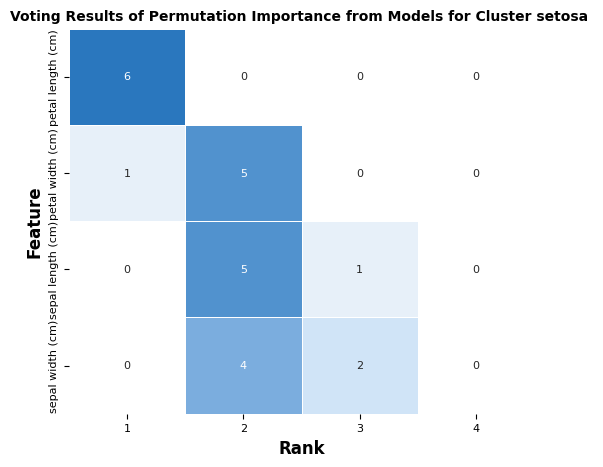

Plotting heatmap for segment versicolor


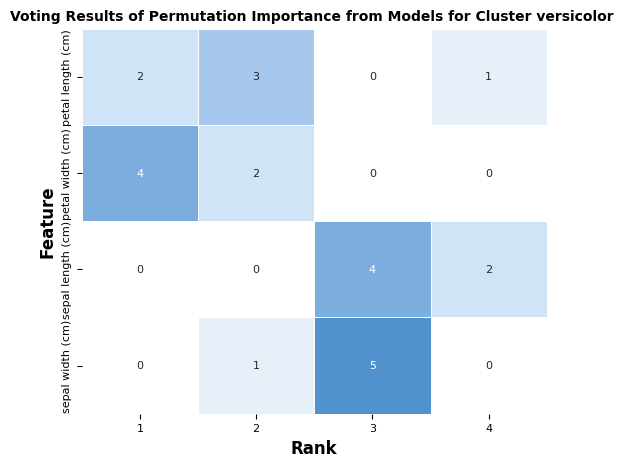

Plotting heatmap for segment virginica


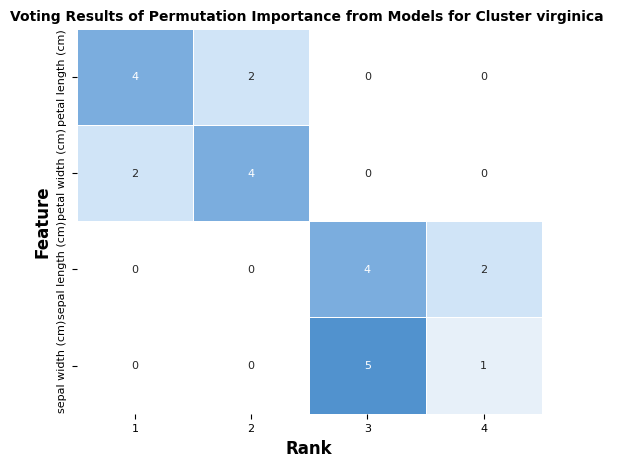

Execution time for plot_vote_result_all_binary_class: 0.3836 seconds


In [86]:
plot_vote_result_all_binary_class(final_pvt_imp_score=final_pvt_imp_score)

##### get intersect feature

In [87]:
lean_feature_list,_ = filter_thres_features(final_pvt_imp_score= final_pvt_imp_score, thres_score=3)
lean_feature_list

Total features from raw : 4
Total features remaining after lean from vote results: 4
Execution time for filter_thres_features: 0.0027 seconds


['petal length (cm)',
 'sepal width (cm)',
 'petal width (cm)',
 'sepal length (cm)']

In [88]:
lean_feature_cluster_dict,union_lean_feature_list, _ = filter_thres_features_by_cluster(final_pvt_imp_score=final_pvt_imp_score, 
                              thres_score=3 )

Cluster setosa:
  Total features from raw: 4
  Total features remaining after lean from vote results: 4
Cluster versicolor:
  Total features from raw: 4
  Total features remaining after lean from vote results: 4
Cluster virginica:
  Total features from raw: 4
  Total features remaining after lean from vote results: 4

Union across all clusters:
  Total union features: 4
Execution time for filter_thres_features_by_cluster: 0.0071 seconds


In [89]:
lean_feature_cluster_dict['setosa']['lean_feature_list']

['petal length (cm)',
 'petal width (cm)',
 'sepal length (cm)',
 'sepal width (cm)']

## test_chisquare

In [90]:
from post_analysis_clustering.test_chisquare import *

In [91]:
bin_df = bin_features(df=df_iris, features=union_lean_feature_list)
bin_df

Execution time for bin_features: 0.0104 seconds


,id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name,petal length (cm)_bin,petal width (cm)_bin,sepal length (cm)_bin,sepal width (cm)_bin
0,0,5.1,3.5,1.4,0.2,0,setosa,"(0.999, 2.18]","(0.099, 0.58]","(5.02, 5.74]","(3.44, 3.92]"
1,1,4.9,3.0,1.4,0.2,0,setosa,"(0.999, 2.18]","(0.099, 0.58]","(4.2989999999999995, 5.02]","(2.96, 3.44]"
2,2,4.7,3.2,1.3,0.2,0,setosa,"(0.999, 2.18]","(0.099, 0.58]","(4.2989999999999995, 5.02]","(2.96, 3.44]"
3,3,4.6,3.1,1.5,0.2,0,setosa,"(0.999, 2.18]","(0.099, 0.58]","(4.2989999999999995, 5.02]","(2.96, 3.44]"
4,4,5.0,3.6,1.4,0.2,0,setosa,"(0.999, 2.18]","(0.099, 0.58]","(4.2989999999999995, 5.02]","(3.44, 3.92]"
...,...,...,...,...,...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,2,virginica,"(4.54, 5.72]","(2.02, 2.5]","(6.46, 7.18]","(2.96, 3.44]"
146,146,6.3,2.5,5.0,1.9,2,virginica,"(4.54, 5.72]","(1.54, 2.02]","(5.74, 6.46]","(2.48, 2.96]"
147,147,6.5,3.0,5.2,2.0,2,virginica,"(4.54, 5.72]","(1.54, 2.02]","(6.46, 7.18]","(2.96, 3.44]"
148,148,6.2,3.4,5.4,2.3,2,virginica,"(4.54, 5.72]","(2.02, 2.5]","(5.74, 6.46]","(2.96, 3.44]"


In [92]:
bin_df['sepal length (cm)_bin'].value_counts()

sepal length (cm)_bin
(5.74, 6.46]                  42
(5.02, 5.74]                  41
(4.2989999999999995, 5.02]    32
(6.46, 7.18]                  24
(7.18, 7.9]                   11
Name: count, dtype: int64

In [93]:
bin_df = bin_features_neg_zero_pos(df=df_iris, features=union_lean_feature_list)
bin_df

Execution time for bin_features_neg_zero_pos: 0.0216 seconds


,id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name,petal length (cm)_bin,petal width (cm)_bin,sepal length (cm)_bin,sepal width (cm)_bin
0,0,5.1,3.5,1.4,0.2,0,setosa,"(0.999, 2.18]","(0.099, 0.58]","(5.02, 5.74]","(3.44, 3.92]"
1,1,4.9,3.0,1.4,0.2,0,setosa,"(0.999, 2.18]","(0.099, 0.58]","(4.2989999999999995, 5.02]","(2.96, 3.44]"
2,2,4.7,3.2,1.3,0.2,0,setosa,"(0.999, 2.18]","(0.099, 0.58]","(4.2989999999999995, 5.02]","(2.96, 3.44]"
3,3,4.6,3.1,1.5,0.2,0,setosa,"(0.999, 2.18]","(0.099, 0.58]","(4.2989999999999995, 5.02]","(2.96, 3.44]"
4,4,5.0,3.6,1.4,0.2,0,setosa,"(0.999, 2.18]","(0.099, 0.58]","(4.2989999999999995, 5.02]","(3.44, 3.92]"
...,...,...,...,...,...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,2,virginica,"(4.54, 5.72]","(2.02, 2.5]","(6.46, 7.18]","(2.96, 3.44]"
146,146,6.3,2.5,5.0,1.9,2,virginica,"(4.54, 5.72]","(1.54, 2.02]","(5.74, 6.46]","(2.48, 2.96]"
147,147,6.5,3.0,5.2,2.0,2,virginica,"(4.54, 5.72]","(1.54, 2.02]","(6.46, 7.18]","(2.96, 3.44]"
148,148,6.2,3.4,5.4,2.3,2,virginica,"(4.54, 5.72]","(2.02, 2.5]","(5.74, 6.46]","(2.96, 3.44]"


In [94]:
bin_df['sepal length (cm)_bin'].value_counts()

/tmp/ipykernel_21365/2086817302.py:1: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  bin_df['sepal length (cm)_bin'].value_counts()


sepal length (cm)_bin
(5.74, 6.46]                  42
(5.02, 5.74]                  41
(4.2989999999999995, 5.02]    32
(6.46, 7.18]                  24
(7.18, 7.9]                   11
Name: count, dtype: int64

In [95]:
pval_df = test_chi_square_segment_vs_rest(df=df_iris, 
                                          features=union_lean_feature_list,
                                          target_cluster='species_name', 
                                          binary_target_prefix="is_cluster_",
                                          n_bins=5,
                                          bin_type= 'handle_neg_zero_pos'
                                         )

Execution time for prep_binary_class: 0.0021 seconds
Execution time for bin_features_neg_zero_pos: 0.0214 seconds
List of binary class columns : ['is_cluster_setosa', 'is_cluster_versicolor', 'is_cluster_virginica']
List of binned features : ['petal length (cm)_bin', 'petal width (cm)_bin', 'sepal length (cm)_bin', 'sepal width (cm)_bin']
Execution time for test_chi_square_segment_vs_rest: 0.0933 seconds


In [96]:
pval_df

,setosa,versicolor,virginica
petal length (cm)_bin,2.035764e-31,4.955872e-21,4.955872e-21
petal width (cm)_bin,1.420189e-30,6.460196e-24,9.324210e-25
sepal length (cm)_bin,2.780293e-17,5.294900e-04,3.252240e-13
sepal width (cm)_bin,8.947062e-12,2.608708e-07,2.437081e-02


In [97]:
pval_df.index

Index(['petal length (cm)_bin', 'petal width (cm)_bin',
       'sepal length (cm)_bin', 'sepal width (cm)_bin'],
      dtype='object')

In [98]:
interpret_pvalues(pval_df, alpha=0.05)


Chi-Square Significance Test Results (alpha = 0.05 )
H0: Feature distribution in this segment is the same as the rest
H1: Feature distribution in this segment is different from the rest

Execution time for interpret_pvalues: 0.0011 seconds


,setosa,versicolor,virginica
petal length (cm)_bin,Significant (Reject H0),Significant (Reject H0),Significant (Reject H0)
petal width (cm)_bin,Significant (Reject H0),Significant (Reject H0),Significant (Reject H0)
sepal length (cm)_bin,Significant (Reject H0),Significant (Reject H0),Significant (Reject H0)
sepal width (cm)_bin,Significant (Reject H0),Significant (Reject H0),Significant (Reject H0)


In [99]:
logworth_df = calculate_logworth_scores(pval_df, min_valid_p=1e-300)
logworth_df


LogWorth scores calculated. Higher values = more significant.
Execution time for calculate_logworth_scores: 0.0017 seconds


,setosa,versicolor,virginica
petal length (cm)_bin,30.6913,20.3049,20.3049
petal width (cm)_bin,29.8477,23.1898,24.0304
sepal length (cm)_bin,16.5559,3.2761,12.4878
sepal width (cm)_bin,11.0483,6.5836,1.6131


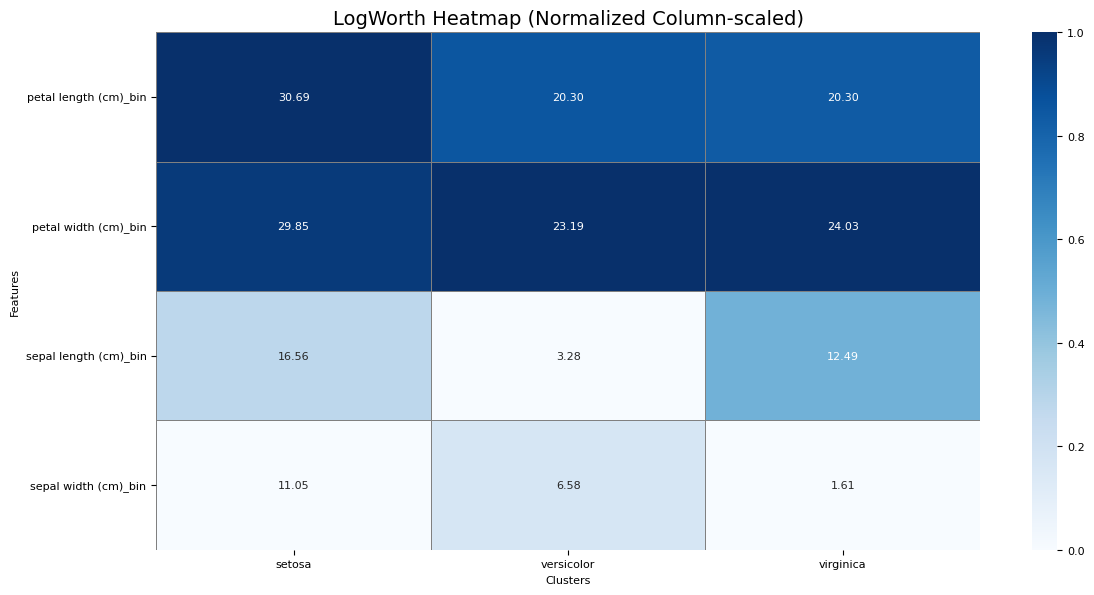

Execution time for plot_heatmap_logworth_colscaled: 0.2216 seconds


In [100]:
plot_heatmap_logworth_colscaled(logworth_df,compare_type='Normalized')

In [101]:
sig_dict, sig_union, sig_union_scaled = get_significant_features_by_pval(pval_df, alpha=0.05)

Total lean features from prior process: 4
------Result after perform chi-square test------
Cluster setosa:
  Total significant features: 4
Cluster versicolor:
  Total significant features: 4
Cluster virginica:
  Total significant features: 4

Union across all clusters:
  Total union features: 4
Execution time for get_significant_features_by_pval: 0.0019 seconds


In [102]:
sig_dict, sig_union, sig_union_scaled =get_significant_features_by_logworth(logworth_df, thres_logworth=3)

Total lean features from prior process: 4
------Result after perform chi-square test------
Cluster setosa:
  Total significant features: 4
Cluster versicolor:
  Total significant features: 4
Cluster virginica:
  Total significant features: 3

Union across all clusters:
  Total union features: 4
Execution time for get_significant_features_by_logworth: 0.0020 seconds


## plot_vis_cluster

In [153]:
from post_analysis_clustering.plot_vis_cluster import *

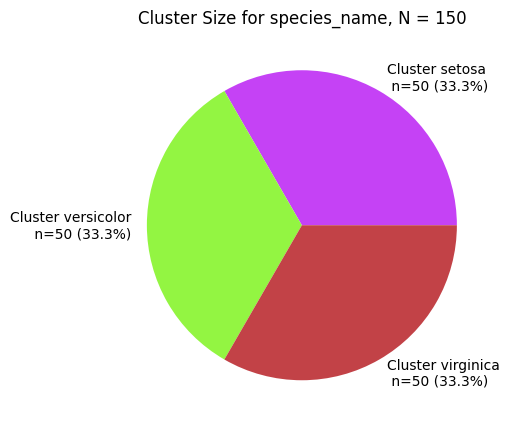

Execution time for plot_pie_cluster: 0.0835 seconds


In [43]:
plot_pie_cluster(df_in = df_iris,
                target_cluster = 'species_name'
                )

#### Describe

In [44]:
get_descriptive_stats(raw_df = df_iris, 
                      features = union_lean_feature_list,
                      target_cluster='species_name', 
                      filter_col_keywords = None)


📊 Descriptive Statistics for petal length (cm):
 species_name  setosa  versicolor  virginica
count          50.00       50.00      50.00
mean            1.46        4.26       5.55
std             0.17        0.47       0.55
min             1.00        3.00       4.50
25%             1.40        4.00       5.10
50%             1.50        4.35       5.55
75%             1.58        4.60       5.88
max             1.90        5.10       6.90

📊 Descriptive Statistics for petal width (cm):
 species_name  setosa  versicolor  virginica
count          50.00       50.00      50.00
mean            0.25        1.33       2.03
std             0.11        0.20       0.27
min             0.10        1.00       1.40
25%             0.20        1.20       1.80
50%             0.20        1.30       2.00
75%             0.30        1.50       2.30
max             0.60        1.80       2.50

📊 Descriptive Statistics for sepal length (cm):
 species_name  setosa  versicolor  virginica
count          

#### Violin & Box

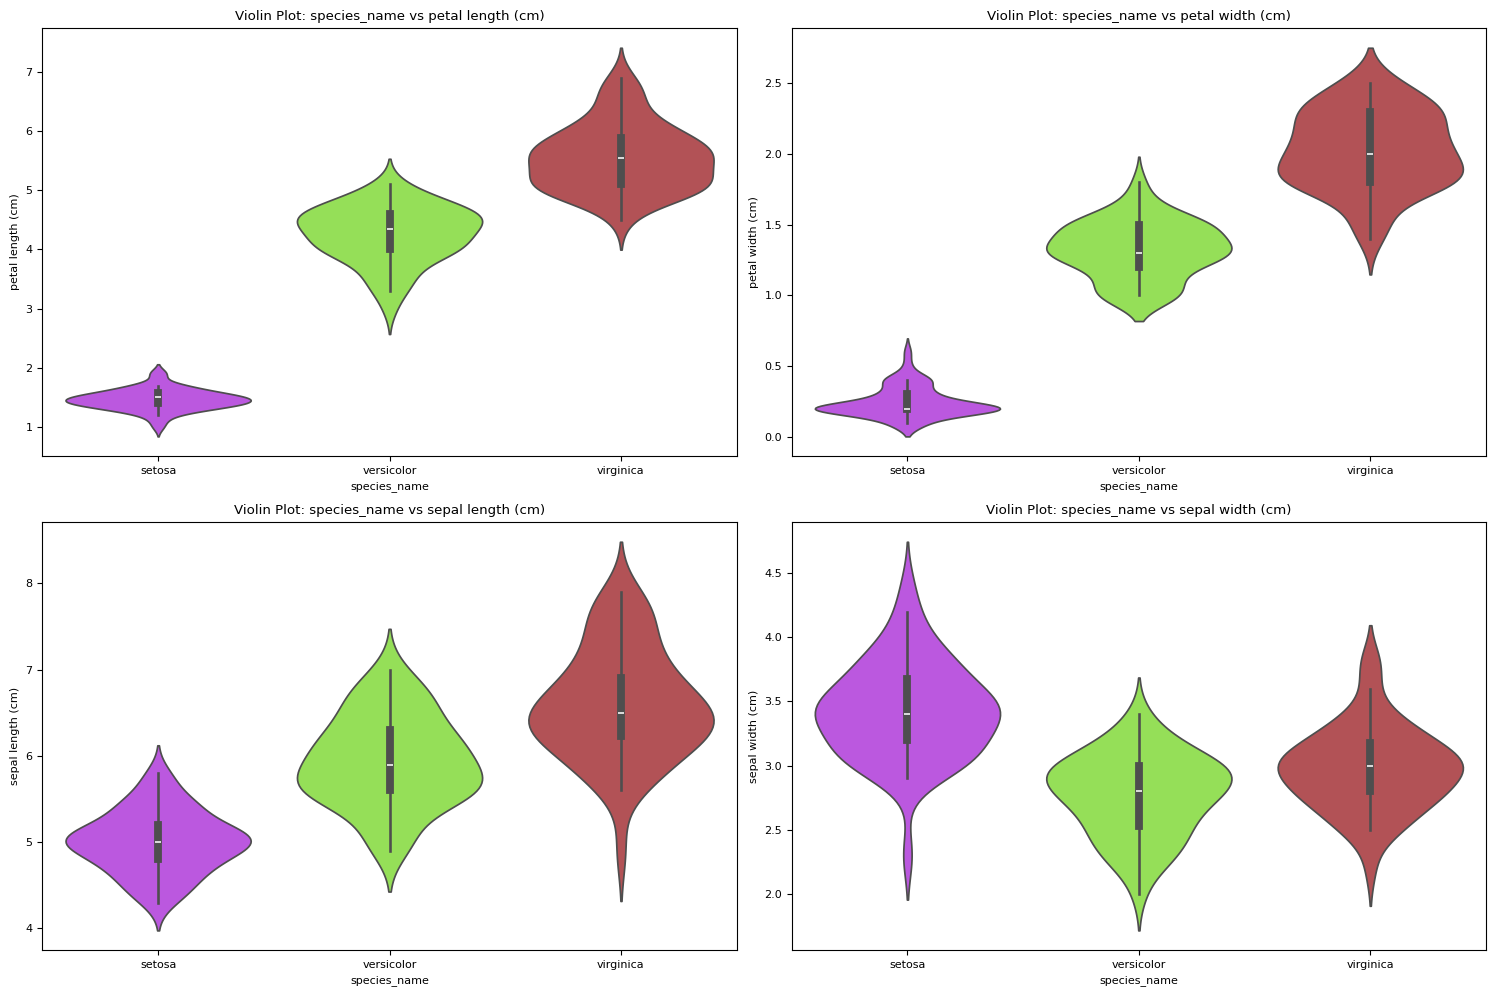

Execution time for plot_violin: 1.0570 seconds


In [45]:
plot_violin(raw_df = df_iris, 
            features = union_lean_feature_list,
            target_cluster='species_name', 
            filter_col_keywords = None
           )

#### Heatmap of Freq

##### discrete

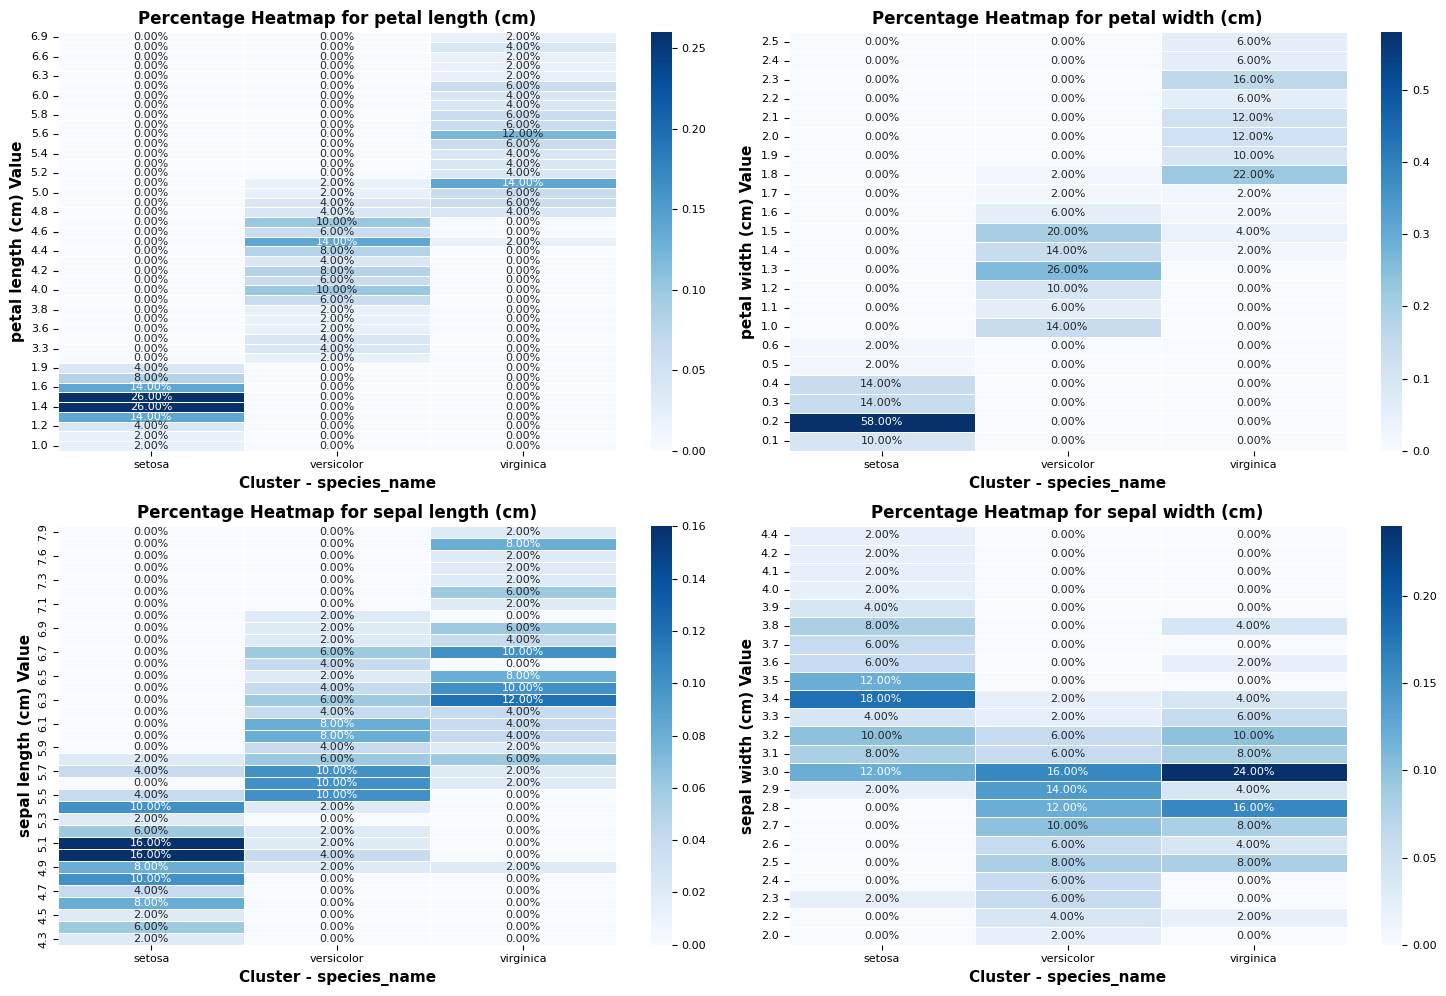

Execution time for plot_crosstab: 2.6027 seconds


In [46]:
plot_crosstab(raw_df = df_iris, 
              features = union_lean_feature_list,
              target_cluster='species_name', 
              filter_col_keywords = None,
              compare_type='Percentage',
              annot_type='Percentage') # nunique น้อยๆ พวก count ได้

##### continuous -bin

Execution time for prep_bin_heatmap: 0.0121 seconds
Execution time for prep_bin_heatmap: 0.0106 seconds
Execution time for prep_bin_heatmap: 0.0095 seconds
Execution time for prep_bin_heatmap: 0.0098 seconds


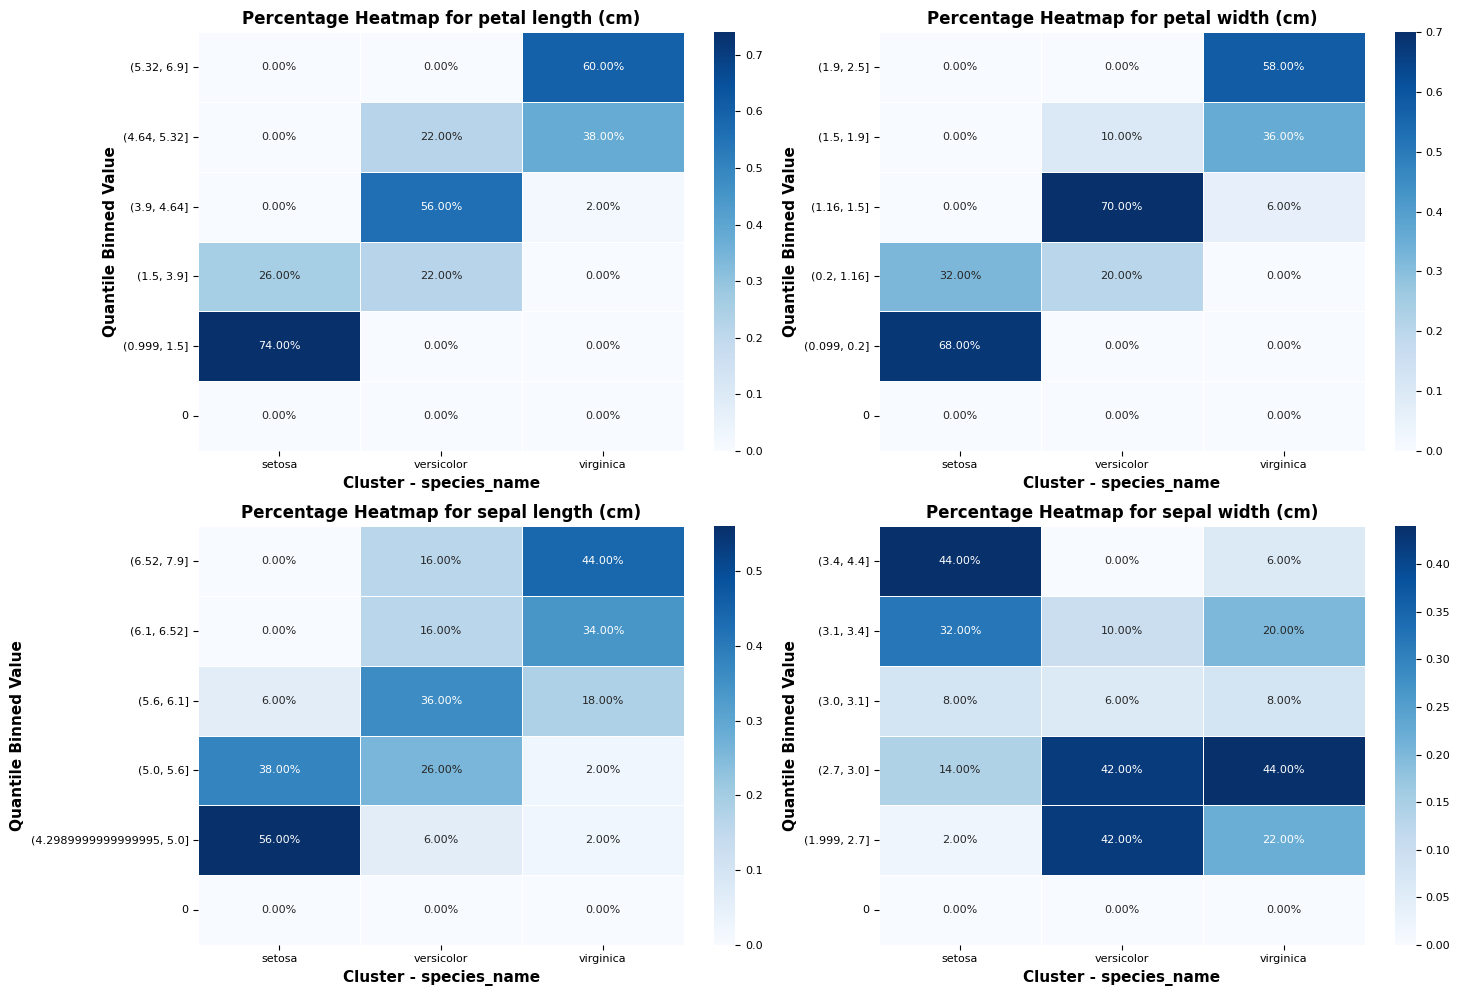

Execution time for plot_bin_heatmap: 1.6084 seconds


In [47]:
plot_bin_heatmap(raw_df = df_iris, 
                  features = union_lean_feature_list,
                  target_cluster='species_name', 
                  filter_col_keywords = None,
                  annot_type='Percentage'
                )

Execution time for prep_bin_heatmap: 0.0130 seconds
Execution time for prep_bin_heatmap: 0.0102 seconds
Execution time for prep_bin_heatmap: 0.0095 seconds
Execution time for prep_bin_heatmap: 0.0101 seconds


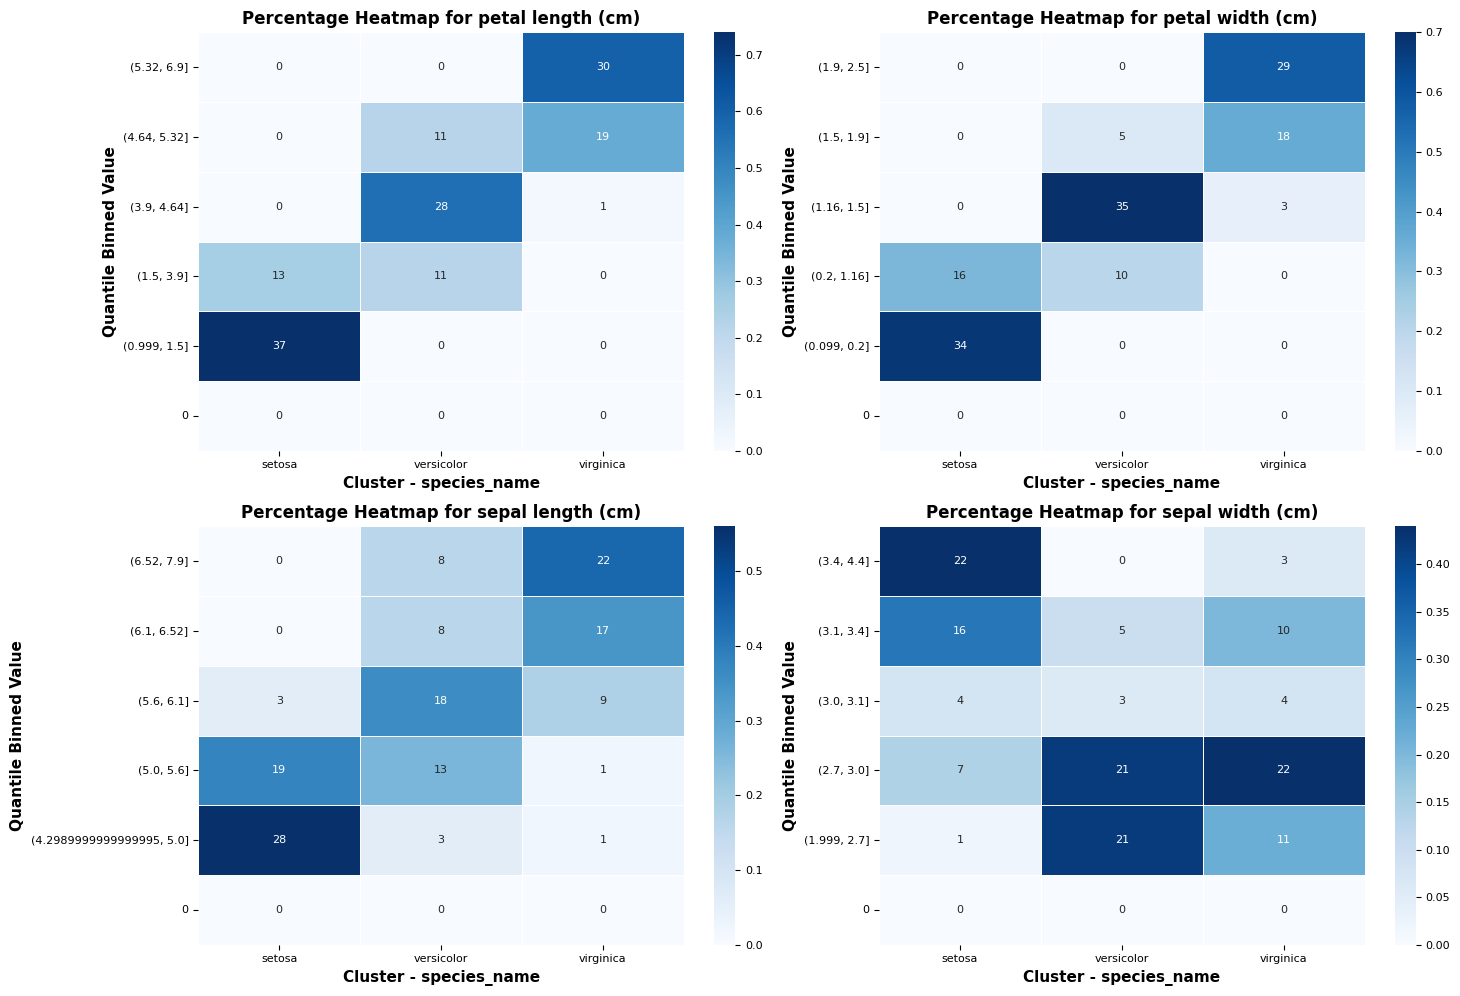

Execution time for plot_bin_heatmap: 1.4085 seconds


In [48]:
plot_bin_heatmap(raw_df = df_iris, 
              features = union_lean_feature_list,
              target_cluster='species_name', 
              filter_col_keywords = None,
                 annot_type='Actual'
                )

#### Snake

https://medium.com/data-science/customer-segmentation-in-online-retail-1fc707a6f9e6

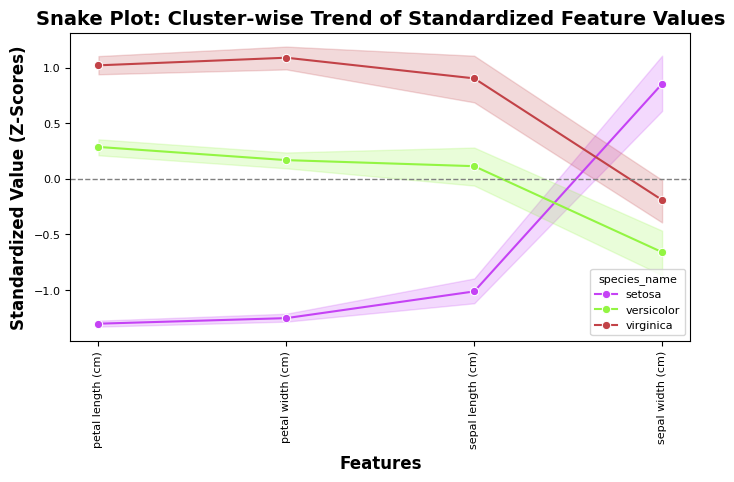

Execution time for plot_snake_scaled: 0.4135 seconds


In [49]:
plot_snake_scaled(raw_df = df_iris, 
                  features = union_lean_feature_list,
                  target_cluster='species_name',
                  primary_key='id', 
                  filter_col_keywords=None)

#### Cluster Stat

In [50]:
cluster_feature_stats_table(
    raw_df = df_iris,
    features = union_lean_feature_list,
    target_cluster = 'species_name',
    filter_col_keywords= None, 
    stats=['count',
           'mean', 
           'mode', 
           'median', 
           'std'
          ]
    )

Execution time for cluster_feature_stats_table: 0.0251 seconds


setosa                         versicolor                   \
                    mean   std count mode median       mean   std count mode   
petal length (cm)   1.46  0.17    50  1.4    1.5       4.26  0.47    50  4.5   
petal width (cm)    0.25  0.11    50  0.2    0.2       1.33  0.20    50  1.3   
sepal length (cm)   5.01  0.35    50  5.0    5.0       5.94  0.52    50  5.5   
sepal width (cm)    3.43  0.38    50  3.4    3.4       2.77  0.31    50  3.0   

                         virginica                          
                  median      mean   std count mode median  
petal length (cm)   4.35      5.55  0.55    50  5.1   5.55  
petal width (cm)    1.30      2.03  0.27    50  1.8   2.00  
sepal length (cm)   5.90      6.59  0.64    50  6.3   6.50  
sepal width (cm)    2.80      2.97  0.32    50  3.0   3.00

#### Relative Imp

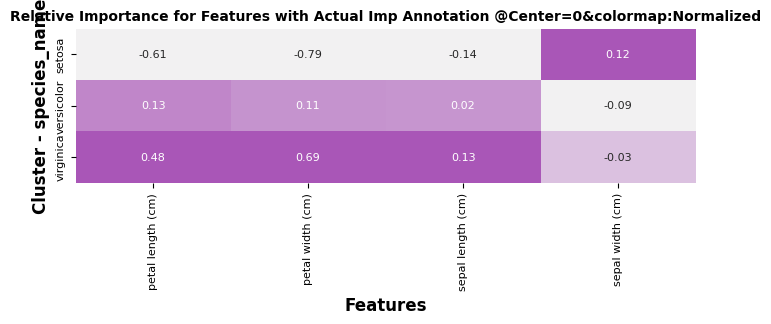

Execution time for plot_relative_imp: 0.1425 seconds


In [51]:
plot_relative_imp(raw_df = df_iris, 
                  features = union_lean_feature_list,
                  target_cluster='species_name', 
                  filter_col_keywords=None,
                  compare_type='Normalized')

#### Group bar

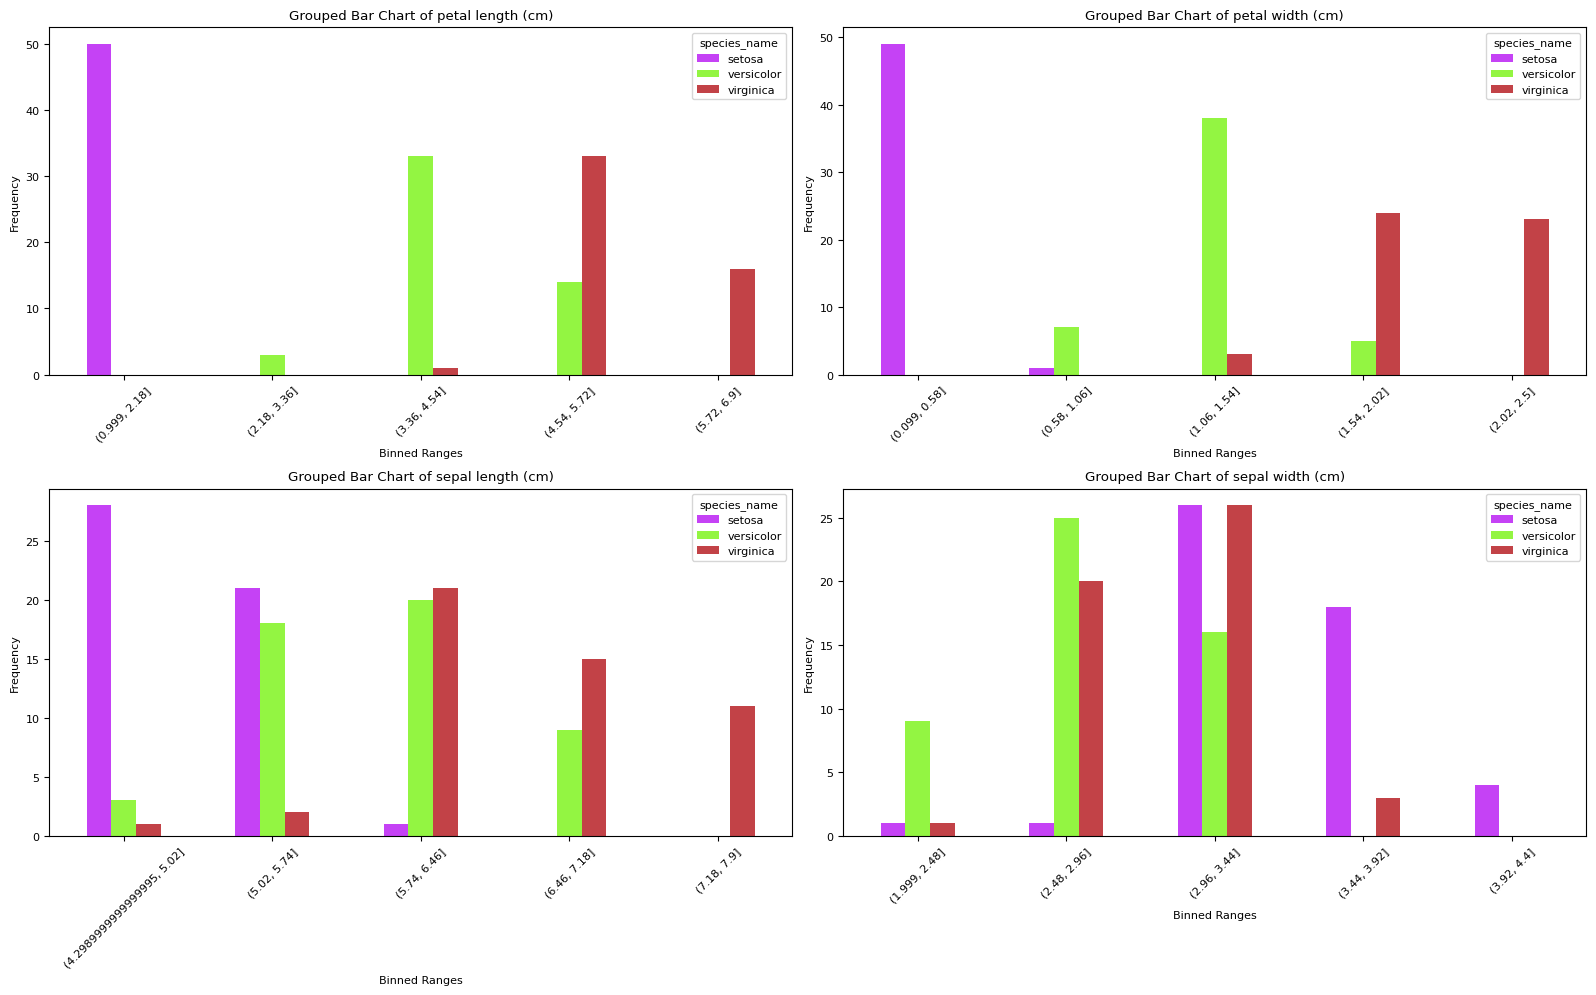

Execution time for plot_grouped_bar_by_bins: 0.9698 seconds


In [52]:
plot_grouped_bar_by_bins(raw_df = df_iris, 
                         features = union_lean_feature_list,
                         target_cluster='species_name', 
                         filter_col_keywords=None,
                         n_bins=5
)

#### Filtered bar

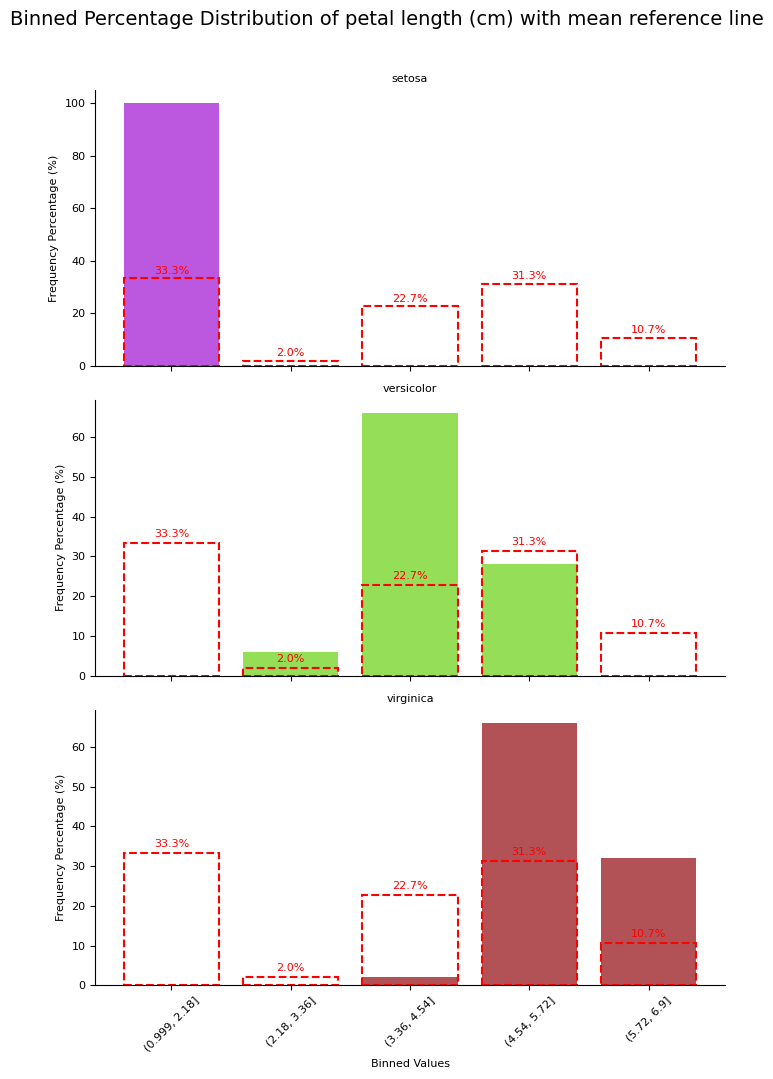

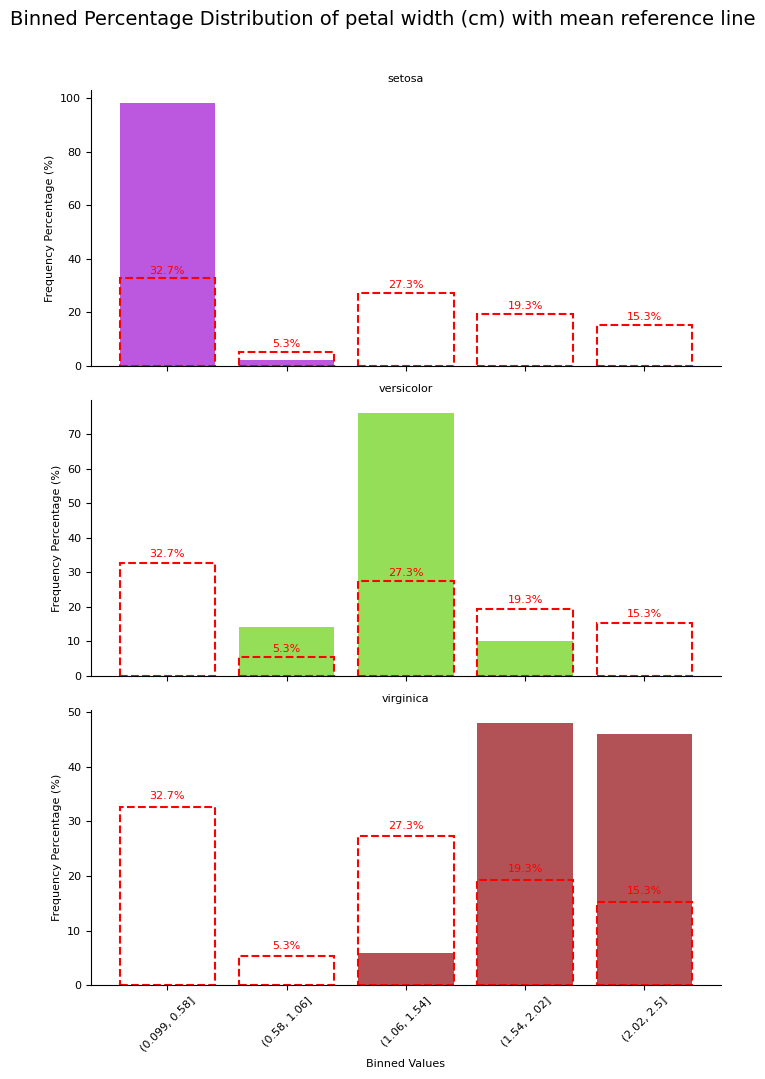

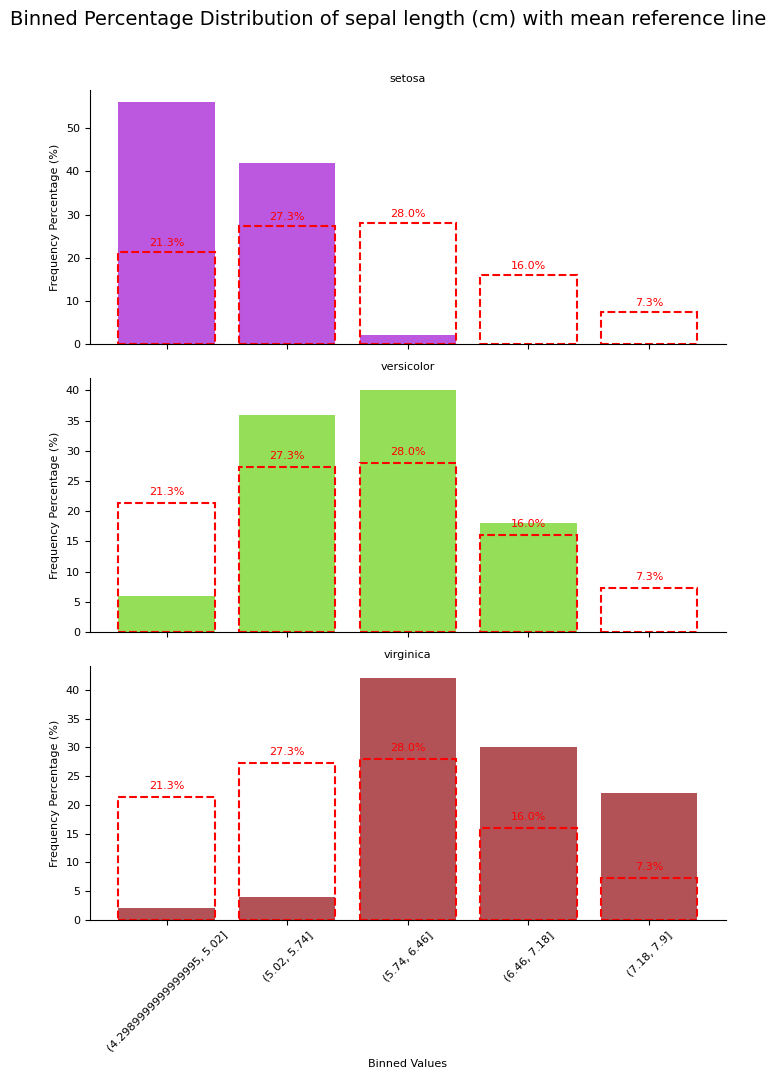

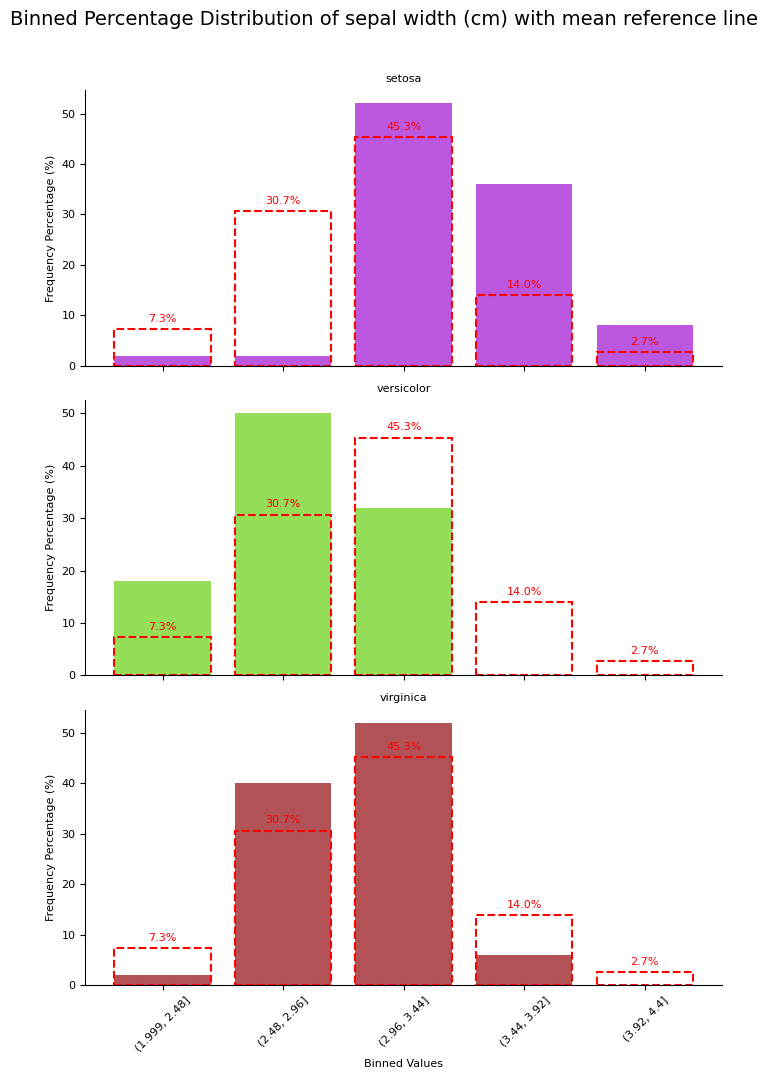

Execution time for plot_stacked_bar_by_bins: 3.3954 seconds


In [53]:
plot_stacked_bar_by_bins(raw_df = df_iris, 
                         features = union_lean_feature_list,
                         target_cluster='species_name', 
                         filter_col_keywords= None,
                         n_bins=5,
                         percent_by = 'segment',
                         reference_stat='mean'
)

#### Radar Chart

https://python-graph-gallery.com/392-use-faceting-for-radar-chart/

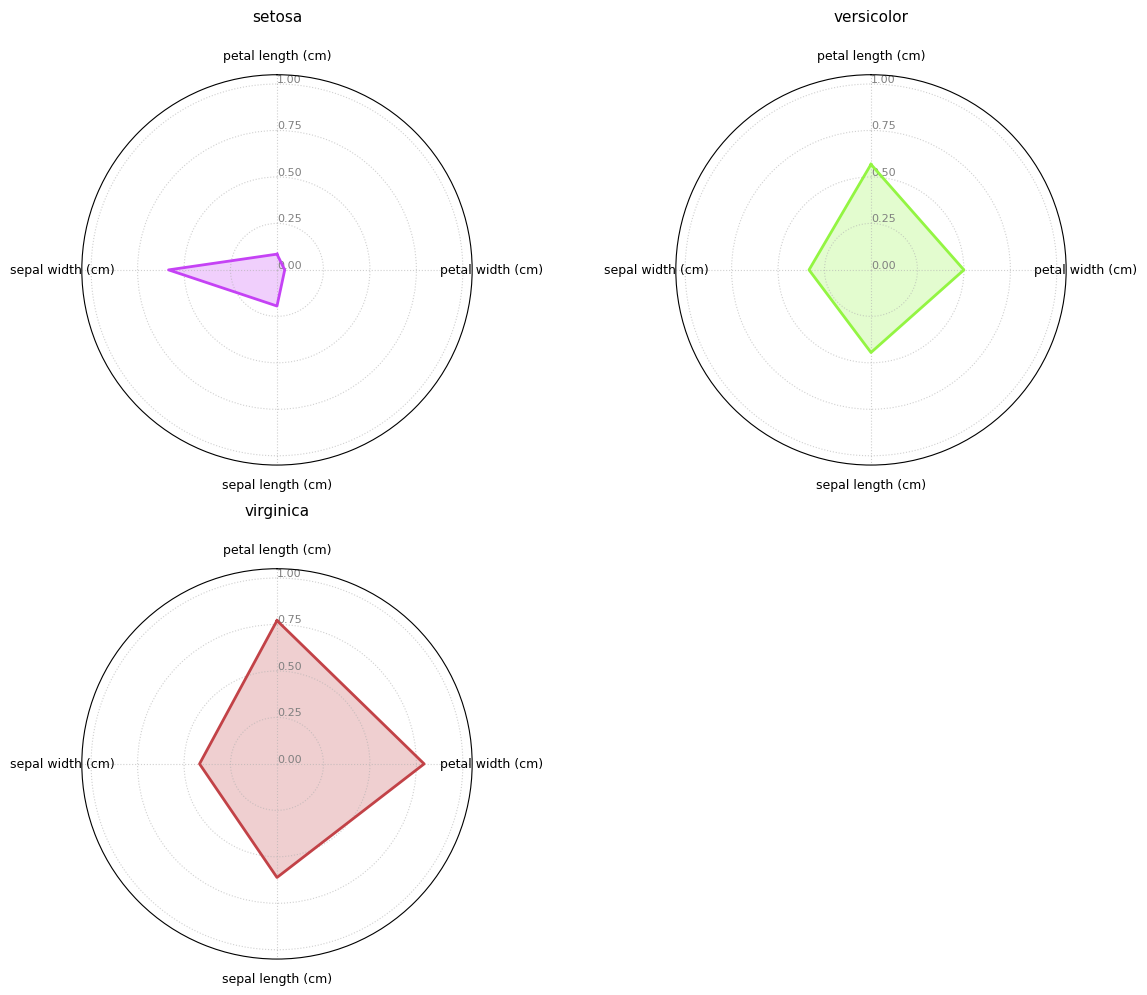

Execution time for plot_radar_chart: 0.8337 seconds


,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
species_name,,,,
setosa,0.084746,0.041667,0.194444,0.583333
versicolor,0.567797,0.500000,0.444444,0.333333
virginica,0.771186,0.791667,0.611111,0.416667


In [157]:
plot_radar_chart(
    raw_df=df_iris,
    features=union_lean_feature_list,
    target_cluster="species_name",
    agg_method="median",
    scaler_type = 'minmax'
)

## plot_overlap

In [54]:
from post_analysis_clustering.plot_overlap import *

### polygon

#### single-plot one pair

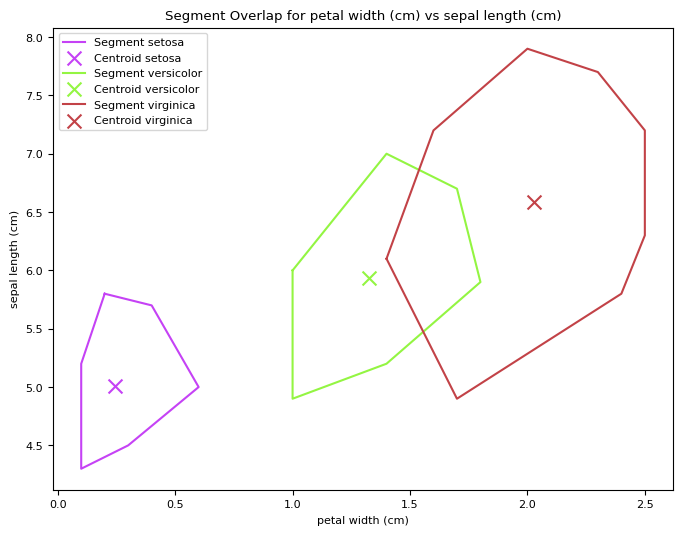

Execution time for plot_segment_overlap: 0.2229 seconds


In [55]:
plot_segment_overlap(data = df_iris, 
                     Xi = union_lean_feature_list[1], 
                     Xj = union_lean_feature_list[2], 
                     segments = 'species_name', 
                     feature_list = union_lean_feature_list)

#### all pair

Execution time for plot_segment_overlap_polygon_ax: 0.0150 seconds
Execution time for plot_segment_overlap_polygon_ax: 0.0158 seconds
Execution time for plot_segment_overlap_polygon_ax: 0.0158 seconds
Execution time for plot_segment_overlap_polygon_ax: 0.0155 seconds
Execution time for plot_segment_overlap_polygon_ax: 0.0147 seconds
Execution time for plot_segment_overlap_polygon_ax: 0.0143 seconds


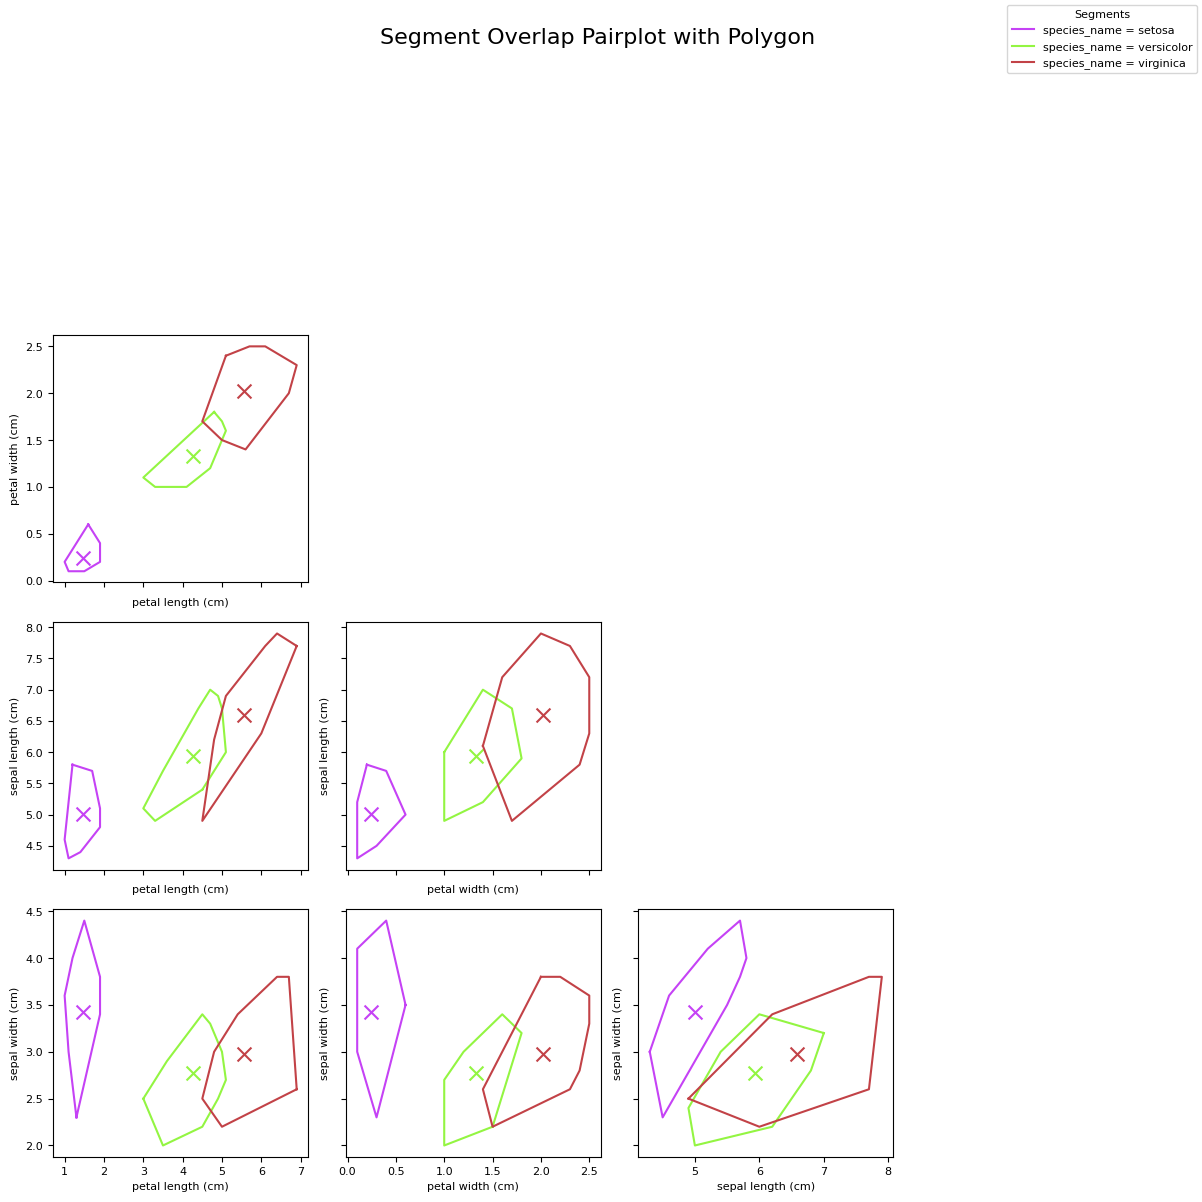

Execution time for plot_custom_polygon_pairplot: 0.9916 seconds


In [56]:
plot_custom_polygon_pairplot(data=df_iris,
              features=union_lean_feature_list,
              segments='species_name', 
              )

### ellipse

#### single-plot one pair

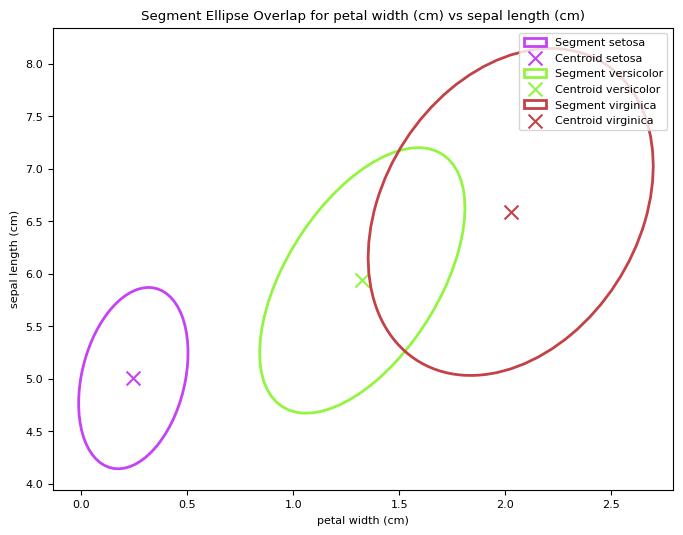

Execution time for plot_segment_ellipse: 0.2342 seconds


In [57]:
plot_segment_ellipse(data = df_iris, 
                     Xi = union_lean_feature_list[1], 
                     Xj = union_lean_feature_list[2], 
                     segments = 'species_name', 
                     confidence_level=  0.95,
                     feature_list = union_lean_feature_list)

#### all pair

Execution time for plot_segment_ellipse_ax: 0.0217 seconds
Execution time for plot_segment_ellipse_ax: 0.0249 seconds
Execution time for plot_segment_ellipse_ax: 0.0233 seconds
Execution time for plot_segment_ellipse_ax: 0.0216 seconds
Execution time for plot_segment_ellipse_ax: 0.0215 seconds
Execution time for plot_segment_ellipse_ax: 0.0211 seconds


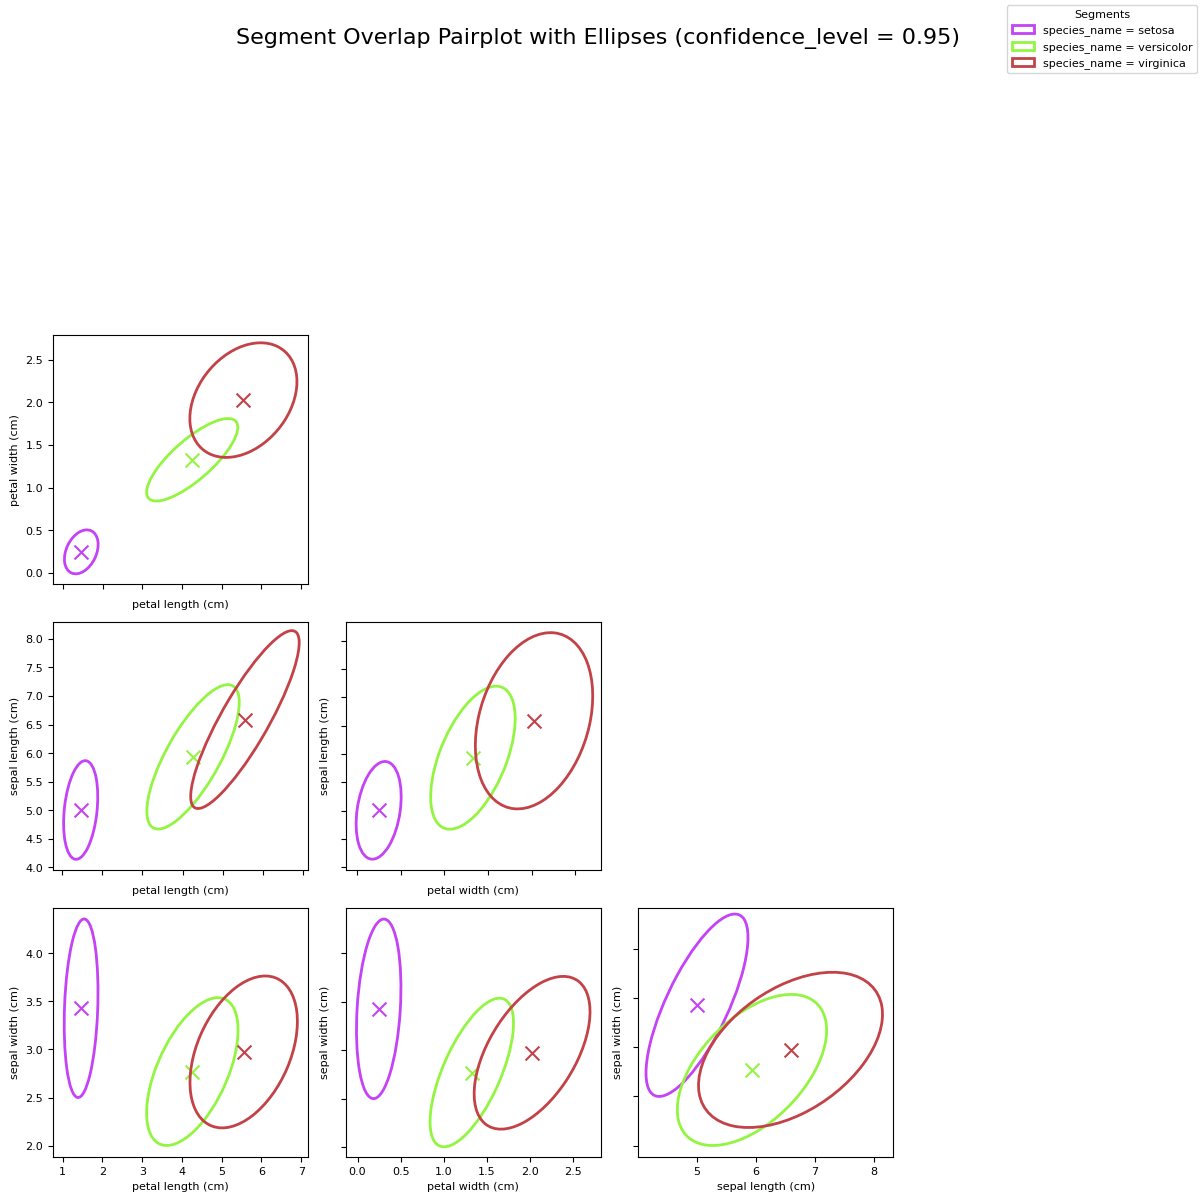

Execution time for plot_custom_ellipse_pairplot: 0.8685 seconds


In [58]:
plot_custom_ellipse_pairplot(data=df_iris,
              features=union_lean_feature_list,
              segments='species_name', 
              confidence_level=0.95
              )

## plot_dim_reduction

https://www.geeksforgeeks.org/difference-between-pca-vs-t-sne/

In [59]:
from post_analysis_clustering.plot_dim_reduction import *

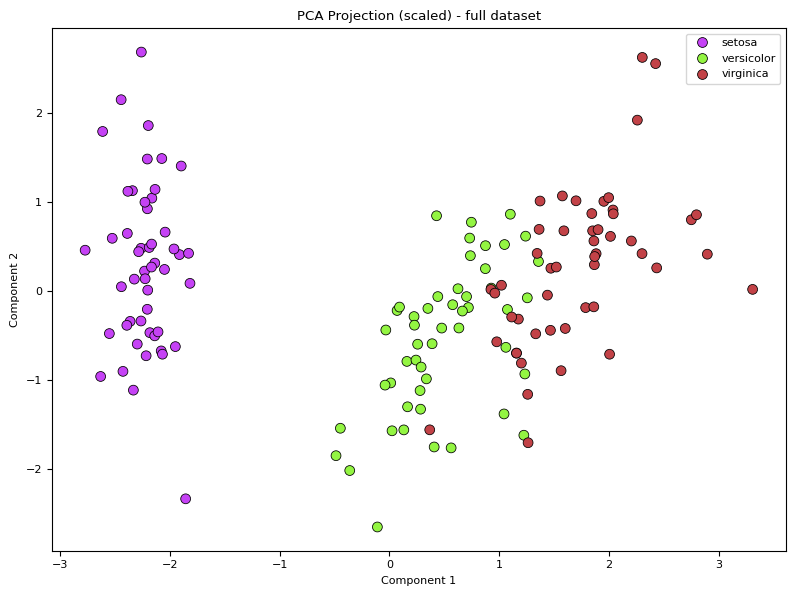

In [60]:
plot_dim_reduction(
    raw_df=df_iris,
    features=union_lean_feature_list,
    target_cluster='species_name',
    method='pca',
    n_components=2,
    title=None,
    scale = True,
    sample_size= None,
    stratify = True
)

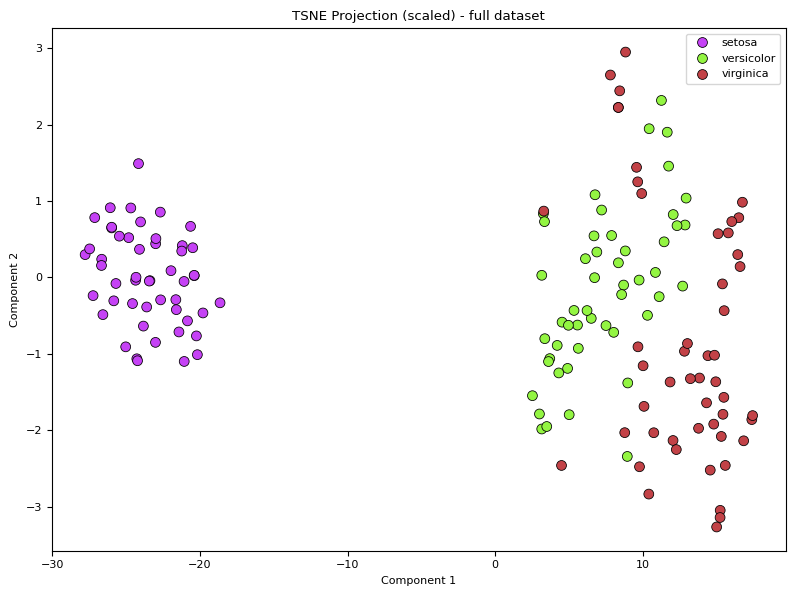

In [61]:
plot_dim_reduction(
    raw_df=df_iris,
    features=union_lean_feature_list,
    target_cluster='species_name',
    method='tsne',
    n_components=2,
    title=None,
    scale = True,
    sample_size= None,
    stratify = True
)

## plot_cluster_metrics

#####  Silhouette Score
Measures how similar a point is to its own cluster compared to others.  
**Range:** -1 to 1 | **Higher is better**

---

##### Davies-Bouldin Index
Evaluates average similarity between clusters based on distance and spread.  
**Range:** 0 to ∞ | **Lower is better**

---

##### Calinski-Harabasz Index
Assesses cluster separation and compactness using dispersion ratios.  
**Range:** 0 to ∞ | **Higher is better**

---


In [62]:
from post_analysis_clustering.plot_cluster_metrics import *

Execution time for compute_cluster_metrics: 0.0101 seconds


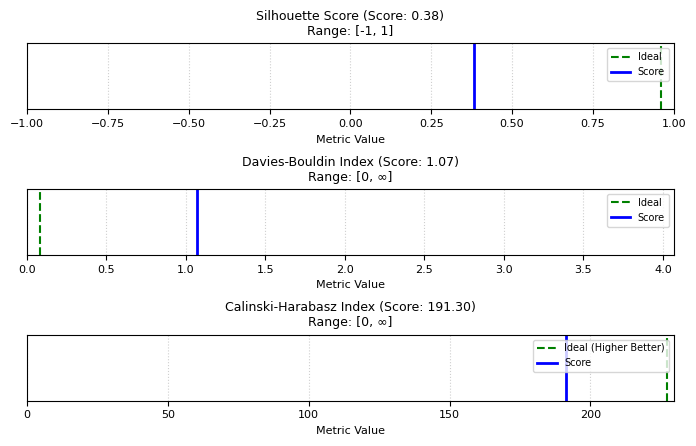

Execution time for plot_cluster_metric_ranges: 0.3575 seconds


In [63]:
plot_cluster_metric_ranges(
    raw_df=df_iris,
    features=union_lean_feature_list,
    target_cluster='species_name',
    scale=True,
    sample_size=None,
    stratify=True
    )